In [8]:
#
import pandas
from statsmodels.tsa.seasonal import MSTL
from matplotlib import pyplot

#
from pmdarima import arima
from pmdarima import datasets
from pmdarima import utils

#


In [83]:
driver = 'JTU5300QUL'
# driver = 'QUSR628BIS'
# driver = 'RAILFRTCARLOADSD11'
# driver = 'FRGSHPUSM649NCIS'
# driver = 'TSIFRGHT'
# driver = 'AIRRTMFMD11'
# driver = 'CUUR0000SEHA'
series = pandas.read_csv('./data/{0}.csv'.format(driver))
# series = data[[driver]].copy()
# series = series.reset_index().rename(columns={'jx': 'ds', driver: 'y'})
series = series.rename(columns={'DATE': 'ds', driver: 'y'})
series['ds'] = pandas.to_datetime(series['ds'])
series['y'] = series['y'].apply(func=lambda x: pandas.NA if x == '.' else x)
series['y'] = series['y'].ffill()
series['y'] = pandas.to_numeric(series['y'])
series = series[series['ds'] > '1970-01-01']
# series['y'] = series['y'].pct_change()
# series = series[series['ds'] > '2000-01-01']
series

,ds,y
0,2000-12-01,50
1,2001-01-01,80
2,2001-02-01,29
3,2001-03-01,28
4,2001-04-01,52
...,...,...
266,2023-02-01,42
267,2023-03-01,44
268,2023-04-01,56
269,2023-05-01,39


In [84]:
# series.set_index('ds').iloc[80:120, :].plot(style='.')  # '.-'

<Axes: xlabel='ds'>

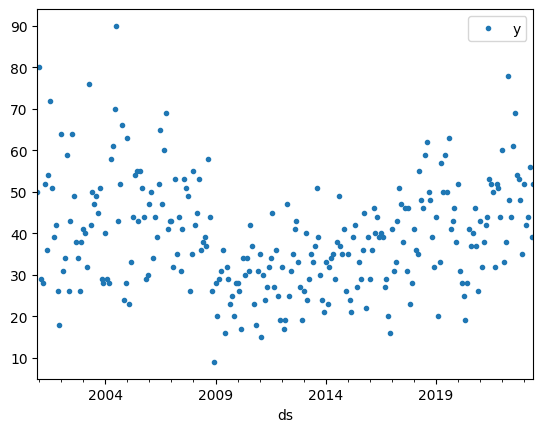

In [85]:
series.set_index('ds').plot(style='.')  # '.-'

Text(0.5, 1.0, 'Ausbeer Seasonal Decomposition')

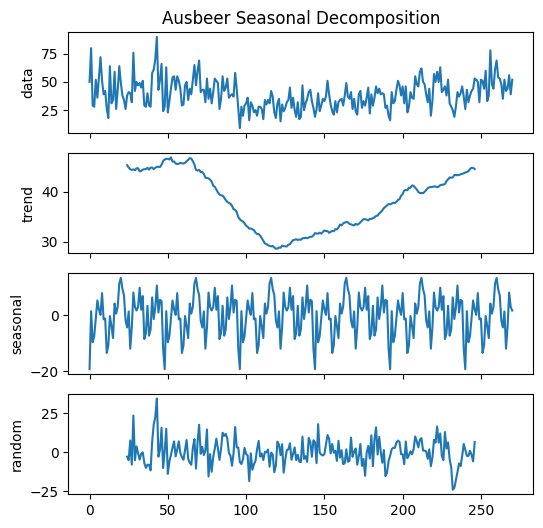

In [86]:
decomposed = arima.decompose(series['y'].values, 'additive', m=48)
# decomposed = arima.decompose(series['y'].values, 'multiplicative', m=48)
figure_kwargs = {'figsize': (6, 6)}  # set figure size for both examples
# Plot the decomposed signal of ausbeer as a subplot

axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs,
                             show=False)
axes[0].set_title("Ausbeer Seasonal Decomposition")

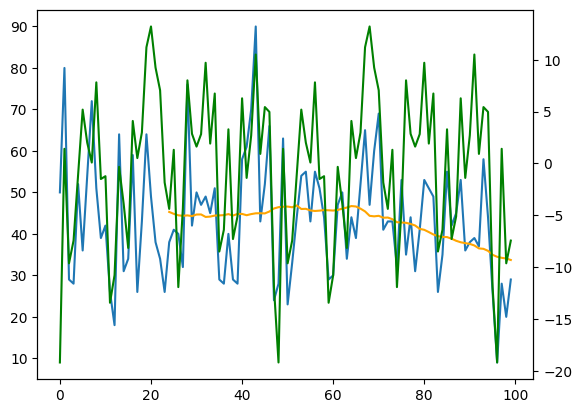

In [87]:
from matplotlib import pyplot
fig, ax = pyplot.subplots()
start, end = 0, 100
tt, x, trend, seasonal = list(range(end-start)), decomposed.x[start:end], decomposed.trend[start:end], decomposed.seasonal[start:end]
ax.plot(tt, x)
ax.plot(tt, trend, 'orange')
ax_sec = ax.twinx()
ax_sec.plot(tt, seasonal, 'green')

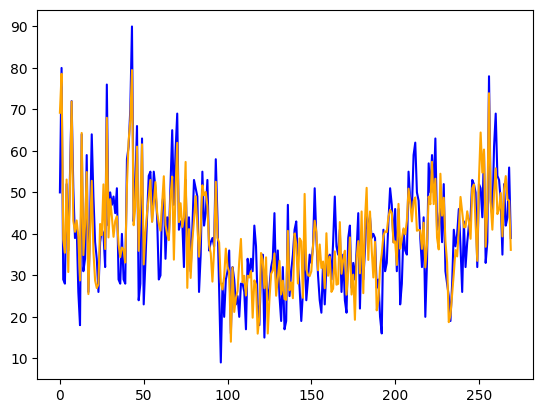

In [88]:
start, end = 0, -1
x = decomposed.x[start:end]
seasonal = decomposed.seasonal[start:end]
deseason = x - seasonal
tt = list(range(len(deseason)))
pyplot.plot(tt, x, 'blue')
pyplot.plot(tt, deseason, 'orange')

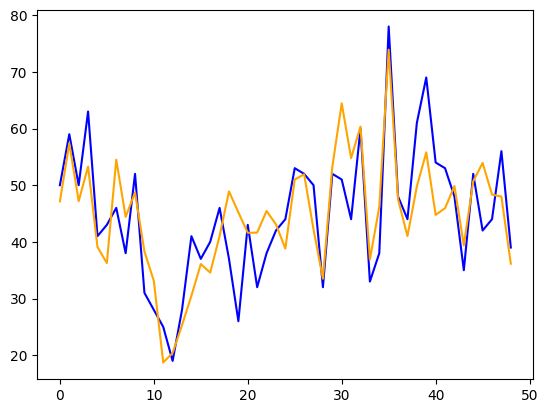

In [89]:
start, end = -50, -1
x = decomposed.x[start:end]
seasonal = decomposed.seasonal[start:end]
deseason = x - seasonal
tt = list(range(len(deseason)))
pyplot.plot(tt, x, 'blue')
pyplot.plot(tt, deseason, 'orange')

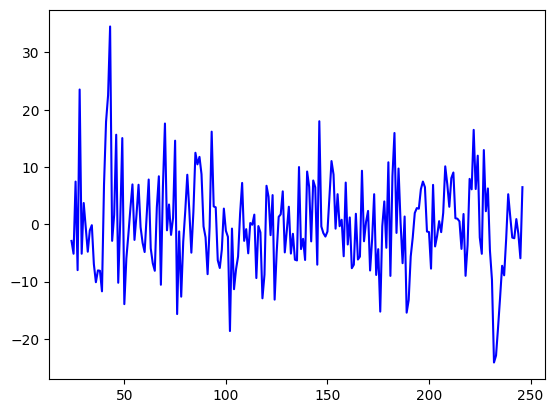

In [90]:
start, end = 0, -1
resid = decomposed.random[start:end]
tt = list(range(len(resid)))
pyplot.plot(tt, resid, 'blue')